<img src="./img/HWNI_logo.svg"/>

# Lab 03a - Unpaired t-Tests

In [65]:
# makes our plots show up inside Jupyter
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

# choose colors that work for most color-blind folks
sns.set_palette("colorblind")
sns.set(color_codes=True)

import util.lab03utils as utils 

# this makes our tables easier to read
utils.formatDataframes()

In this lab, we'll be looking at using unpaired t-tests on data. On the programming side, we'll review some of our plotting skills and learn more about how to load datasets into pandas and how we organize those datasets.

## Dataset Introduction

Octopamine has been implicated in modulating feeding behaviors in both vertebrates and invertebrates. Pargyline has been shown to increase the levels of octopamine in the nervous system. 

We'll look at data from two experiments on octopamine and feeding behavior.

In the first, the effect of pargyline on sucrose consumption was tested in blowflies. Two groups of blowfies were used in this study: one group was injected with parglyine (n=295 flies) while the control group was injected with saline (n = 300 flies). The amount of sucrose consumed was then measured. [adapted from Samuels & Witmer, pg 220. Originally: Long & Murdock, PNAS 1983]

Why is an unpaired test appropriate for this data set?

## Loading Data

The cell below loads the data into pandas. The functions for loading external data all begin with "read", so you can check out your options by typing in `pd.read` and then hitting `Tab`. Other options include Excel files, the clipboard, and `.json` files. You can look at the documentation for each function in the usual way, with the `?` symbol.

The most basic format for storing data is the "comma-separated values", or `.csv`, format. There's a brief discussion of this format in the course tutorial on pandas. You can also view comma-separated values files in Excel and even save some `.xls` files as `.csv` files.

In [15]:
flyData = pd.read_csv('data/3a.csv',index_col=None)

flyData.sample(10)

,SucrConsump,Injection,Exp_Idx
452,36.4,Parg,1
723,17.3,PargYomb,2
528,51.5,Parg,1
434,49.1,Parg,1
163,13.4,Saline,1
513,50.6,Parg,1
70,20.7,Saline,1
233,14.0,Saline,1
280,27.8,Saline,1
617,23.2,Saline,2


Following the principles of ["tidy data"](http://www.jeannicholashould.com/tidy-data-in-python.html), we've stored each of our observations in a row. An observation includes the raw data (in this case, the amount of sugar consumed), the kind of injection the fly received, and, since we'll be looking at two experiments in this lab, an identifier for the experiment during which this datapoint was measured.

## Visualizing the Data

Begin by plotting the histograms and computing means and standard deviations for both groups of flies in experiment #1. Remember: you'll need to subset your data by experiment index and by injection.

Think about your histogram: should the bins be the same or different for the two groups? Is a rugplot helpful? Be ready to discuss your choices in class.

Group Saline:
	 Mean 15.293000000000001, SD 5.440240172208681
Group PargYomb:
	 Mean 14.538461538461538, SD 7.274979790220839


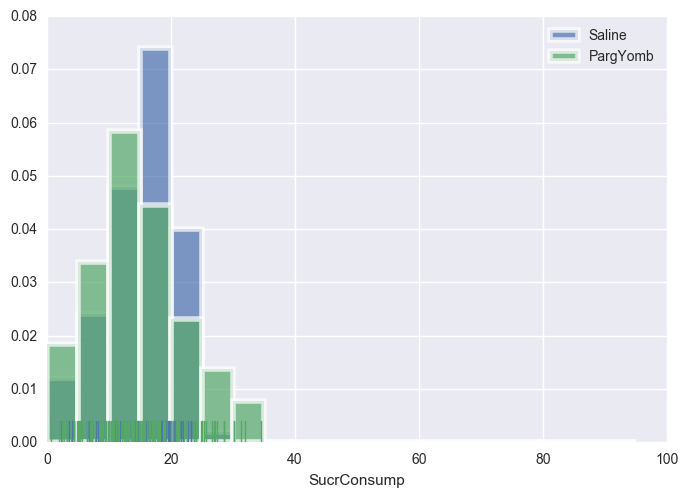

In [71]:
experimentIndex = 2

experimentData = flyData[flyData.Exp_Idx == experimentIndex]
injections = experimentData.Injection.unique()

for injection in injections:
    groupData = experimentData.SucrConsump[experimentData.Injection == injection]
    
    print("Group {}:".format(injection))
    print("\t Mean {0}, SD {1}".format(groupData.mean(),groupData.std()))
    
    sns.distplot(groupData,kde=False,rug=True,label=injection,
                 bins=range(0,100,5),
                    hist_kws={'alpha':0.7,
                              'edgecolor':'white',
                              'linewidth':4,
                              'normed':True}).legend()

Based off of this visualization and these statistics, do you expect the difference of the means to be statistically significant? Why or why not?

Now, visualize the data as a barplot with 95% confidence intervals error bars.

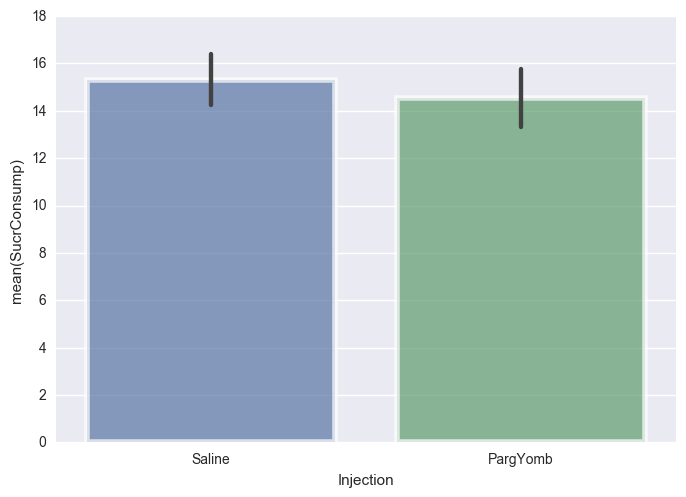

In [72]:
sns.barplot(data=experimentData,x="Injection",y="SucrConsump",ci=95,
            alpha=0.7,edgecolor='white',linewidth=4,);

Based off of the barplot, what do you expect the result of your t-test to be?

Now, plot the data as a boxplot.

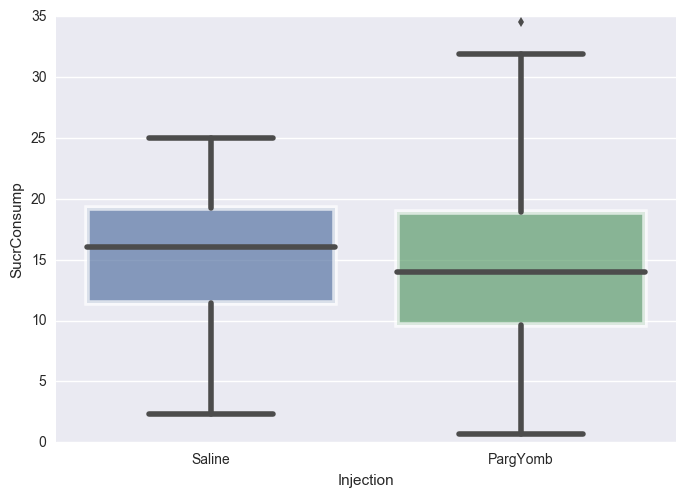

In [73]:
sns.boxplot(data=experimentData,x="Injection",y="SucrConsump",
           linewidth=4,
            boxprops={'edgecolor':'white','alpha':0.7});

The boxplot can be used to help you decide whether a t-test is appropriate or not. What kinds of information would you use?

Now, we can use the `scipy` package to run a t-test to determine if the difference between the groups is statistically significant. The function `scipy.stats.ttest_ind` 
([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html))
will run a t-test for you.

What are your results?

## Running the Test

In [74]:
groups = [experimentData.SucrConsump[experimentData.Injection == injection] for injection in injections]

scipy.stats.ttest_ind(groups[0],groups[1],
                      equal_var=False).pvalue

0.36914041694703414

One of the keyword arguments for `ttest_ind` is `equal_var`. This lets us switch from a version of the t-test that assumes both groups have the same variance to one that does not assume this. Which version is more appropriate in this case?

In a follow-up experiment to further confirm octopamine positively modulates feeding behavior, an additional experiment was done with yohimbine (an antagonist of octopamine receptors in insects). One group was injected with parglyine and yohimbine (n = 130) while an additional control group was injected with saline (n = 100). The amount of sucrose consumed was then measured.

Repeat all of the above exercises for this experiment. There's no need to write all of your code again. Simply include responses for both datasets in the answers above.